In [1]:
# Visualization of Particle-in-Cell results
using PyPlot
using PyCall
ov = pyimport("openpmd_viewer")
ts = ov.OpenPMDTimeSeries("/tmp/13_seed/hdf5")
tns = 1e9 * ts.t # time in nanoseconds
dt = ts.t[2] - ts.t[1]
nothing

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/bach/.julia/packages/PyPlot/XHEG0/src/init.jl:192


In [2]:
rcParams = PyDict(matplotlib["rcParams"])
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Routed Gothic"
rcParams["font.size"] = 15
rcParams["axes.linewidth"] = 1
rcParams["scatter.marker"] = "o"
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"
nothing

In [3]:
_, metadata = ts.get_field("phi")
Lx, Ly = metadata.zmax, metadata.rmax
dx, dy = metadata.dz, metadata.dr
xs, ys = metadata.z, metadata.r
nx, ny = length(xs), length(ys)
e  = ts.get_particle(["id"], "e-")
np = length(e[1])
nothing

In [6]:
it = length(ts.iterations)
Ex = zeros(it, ny, nx)
Ey = zeros(it, ny, nx)
phi = zeros(it, ny, nx)
rho = zeros(it, ny, nx)
nAr = zeros(it, ny, nx)
ne  = zeros(it, ny, nx)
nu1 = zeros(it, ny, nx)
nu2 = zeros(it, ny, nx)
nu3 = zeros(it, ny, nx)
nu4 = zeros(it, ny, nx)
Uk  = zeros(it)
Up  = zeros(it)

using RegularGrids
vol = reshape(cell_volume(create_axial_grid(ys, xs)), ny, nx);

In [7]:
using ProgressMeter
me = 9.109_383_7015e-31 * 1e3 # mass of electron in grams
c0 = 3e8
ε0 = 8.8541878128e-12 # F/m

@showprogress for i=1:it
    Ex[i, :, :],= ts.get_field("E", iteration=ts.iterations[i], coord="x")
    Ey[i, :, :],= ts.get_field("E", iteration=ts.iterations[i], coord="y")
   phi[i, :, :],= ts.get_field("phi", iteration=ts.iterations[i])
   rho[i, :, :],= ts.get_field("rho", iteration=ts.iterations[i])
   nAr[i, :, :],= ts.get_field("nAr+", iteration=ts.iterations[i])
    ne[i, :, :],= ts.get_field("ne-", iteration=ts.iterations[i])
    nu1[i, :, :, :],= ts.get_field("nuMCC-e--1", iteration=ts.iterations[i])
    nu2[i, :, :, :],= ts.get_field("nuMCC-e--2", iteration=ts.iterations[i])
    nu3[i, :, :, :],= ts.get_field("nuMCC-e--3", iteration=ts.iterations[i])
    nu4[i, :, :, :],= ts.get_field("nuMCC-e--4", iteration=ts.iterations[i])
    ux, uy, uz, mass = ts.get_particle(["ux","uy","uz","mass"],
      species="e-", iteration=ts.iterations[i])
    Uk[i] = 0.5sum(c0.^2*ux.^2 .+ c0.^2*uy.^2 .+ c0.^2*uz.^2).*me
    Up[i] = 0.5sum(vol.*Ex[i,:,:].^2 .+ vol.*Ey[i,:,:].^2).*ɛ0
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:59


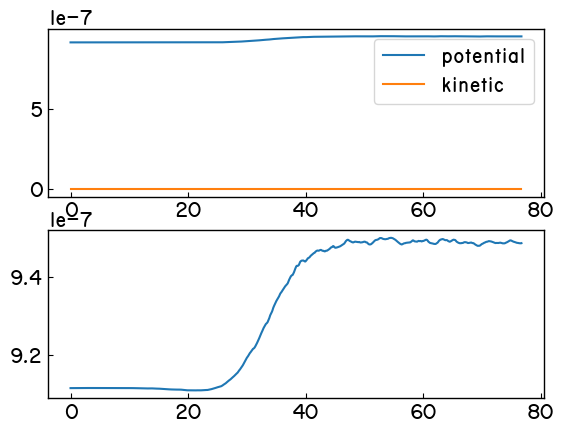

In [26]:
subplot(2,1,1); plot(tns, Up, tns, Uk); legend(["potential","kinetic"])
subplot(2,1,2); plot(tns, Up .+ Uk);

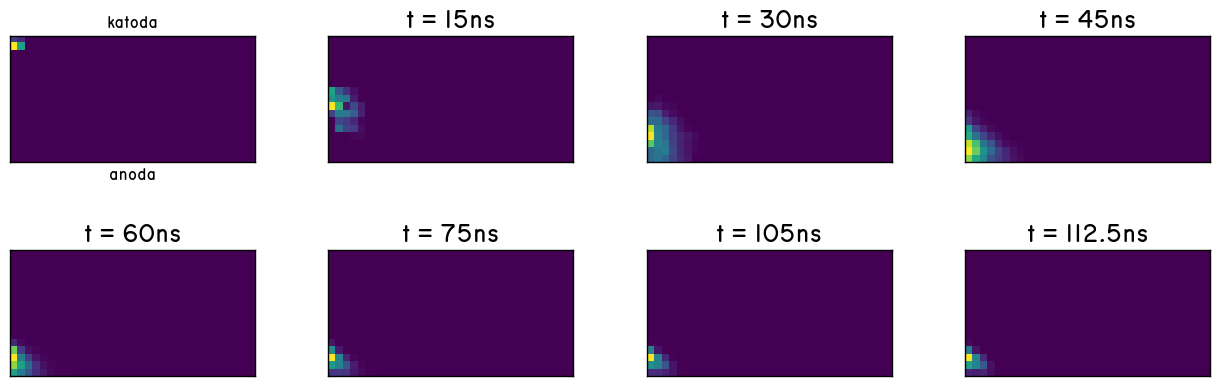

In [27]:
subplot(2,4,1); imshow(ne[1,:,:]); xticks([]); yticks([]);
title("katoda", fontsize=12); xlabel("anoda", fontsize=12)
subplot(2,4,2); imshow(ne[200,:,:]); title("t = 15ns"); xticks([]); yticks([]);
subplot(2,4,3); imshow(ne[300,:,:]); title("t = 30ns"); xticks([]); yticks([]);
subplot(2,4,4); imshow(ne[400,:,:]); title("t = 45ns"); xticks([]); yticks([]);
subplot(2,4,5); imshow(ne[500,:,:]); title("t = 60ns"); xticks([]); yticks([]);
subplot(2,4,6); imshow(ne[600,:,:]); title("t = 75ns"); xticks([]); yticks([]);
subplot(2,4,7); imshow(ne[700,:,:]); title("t = 105ns"); xticks([]); yticks([]);
subplot(2,4,8); imshow(ne[800,:,:]); title("t = 112.5ns"); xticks([]); yticks([]);
subplots_adjust(top=1.0, right=2.0, wspace=0.3, hspace=0.0)

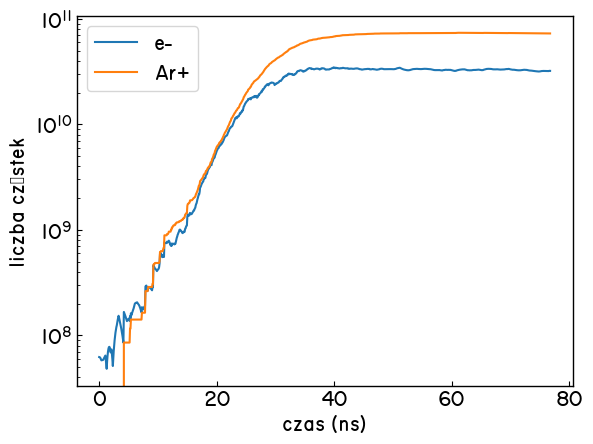

PyObject <matplotlib.legend.Legend object at 0x13fd992d0>

In [28]:
sne = sum(ne; dims=(2,3))
snAr = sum(nAr; dims=(2,3))
semilogy(tns, (5e-6sne[:]), "-", tns, (5e-6snAr[:]), "-");
xlabel("czas (ns)")
ylabel("liczba cząstek")
legend(["e-", "Ar+"])

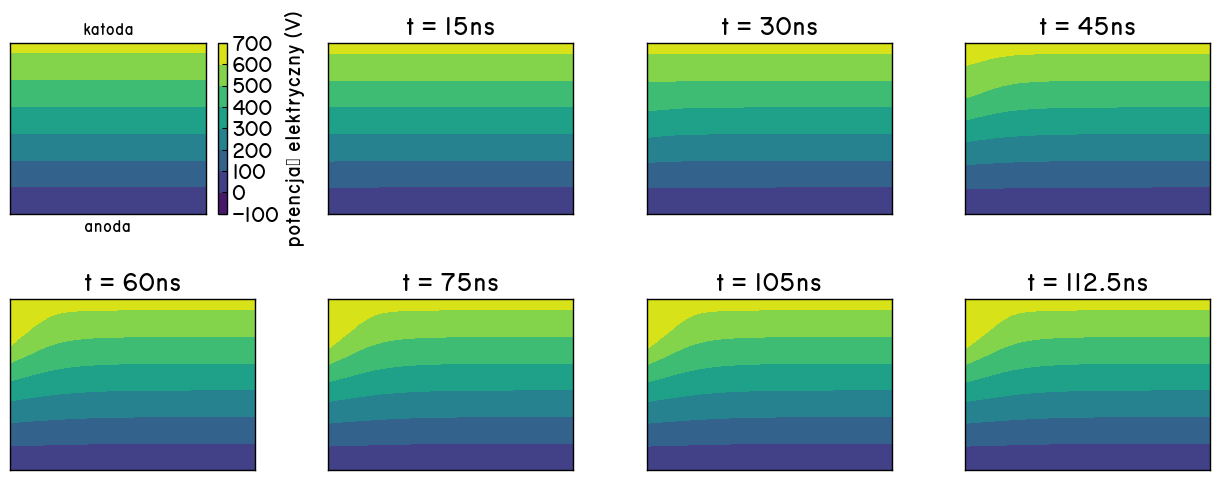

In [29]:
subplot(2,4,1); contourf(xs, ys, phi[1,:,:]);
colorbar().set_label("potencjał elektryczny (V)");  xticks([]); yticks([]);
title("katoda", fontsize=12); xlabel("anoda", fontsize=12)
subplot(2,4,2); contourf(xs, ys, phi[200,:,:]); title("t = 15ns"); xticks([]); yticks([]);
subplot(2,4,3); contourf(xs, ys, phi[300,:,:]); title("t = 30ns"); xticks([]); yticks([]);
subplot(2,4,4); contourf(xs, ys, phi[400,:,:]); title("t = 45ns"); xticks([]); yticks([]);
subplot(2,4,5); contourf(xs, ys, phi[500,:,:]); title("t = 60ns"); xticks([]); yticks([]);
subplot(2,4,6); contourf(xs, ys, phi[600,:,:]); title("t = 75ns"); xticks([]); yticks([]);
subplot(2,4,7); contourf(xs, ys, phi[700,:,:]); title("t = 105ns"); xticks([]); yticks([]);
subplot(2,4,8); contourf(xs, ys, phi[800,:,:]); title("t = 112.5ns"); xticks([]); yticks([]);
subplots_adjust(top=1.0, right=2.0, wspace=0.3, hspace=0.5)

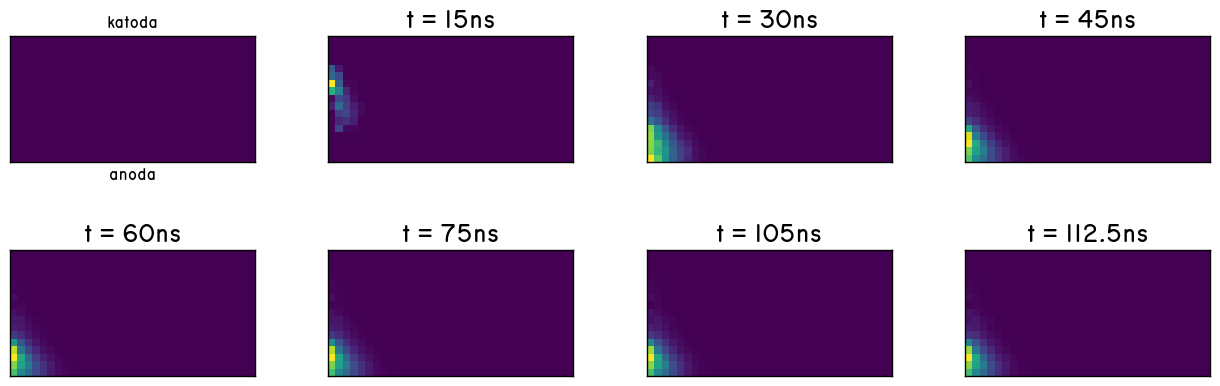

In [30]:
subplot(2,4,1); imshow(nAr[1,:,:]); xticks([]); yticks([]);
title("katoda", fontsize=12); xlabel("anoda", fontsize=12)
subplot(2,4,2); imshow(nAr[200,:,:]); title("t = 15ns"); xticks([]); yticks([]);
subplot(2,4,3); imshow(nAr[400,:,:]); title("t = 30ns"); xticks([]); yticks([]);
subplot(2,4,4); imshow(nAr[600,:,:]); title("t = 45ns"); xticks([]); yticks([]);
subplot(2,4,5); imshow(nAr[800,:,:]); title("t = 60ns"); xticks([]); yticks([]);
subplot(2,4,6); imshow(nAr[900,:,:]); title("t = 75ns"); xticks([]); yticks([]);
subplot(2,4,7); imshow(nAr[1000,:,:]); title("t = 105ns"); xticks([]); yticks([]);
subplot(2,4,8); imshow(nAr[1024,:,:]); title("t = 112.5ns"); xticks([]); yticks([]);
subplots_adjust(top=1.0, right=2.0, wspace=0.3, hspace=0.0)

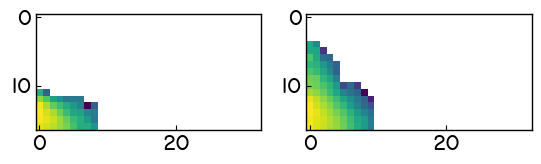

In [31]:
subplot(1,2,1); imshow(log10.(ne[500,:,:]));
subplot(1,2,2); imshow(log10.(nAr[500,:,:]));